In [21]:
import os
import yaml
import pandas as pd
import numpy as np
# import pandas as pd
# from SALib.sample import saltelli
# from SALib.analyze import sobol, fast
# import matplotlib.pyplot as plt
from IPython.display import display
# pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", 250)
#  from progressbar import printProgressBar, PrintProgressBar
import pickle
from matplotlib import pyplot as plt

In [4]:
data_dir = os.path.join(os.getcwd(), 'data')
with open(os.path.join(data_dir, 'yaml', 'params1.yaml'), 'r', encoding='utf-8') as f:
    problem_yaml = f.read()
problem = yaml.safe_load(problem_yaml)

In [5]:
from SALib.sample.fast_sampler import sample as efast_sample
nsamples = 100
paramsets = efast_sample(problem, nsamples, 4, seed=1213)
paramset = paramsets[0]

In [22]:
with open('./data/pickleFile/result_pp2021_12M17D20H4M0.pkl', 'rb') as f:
    result_pp = pickle.load(f)

In [23]:
df_pp = pd.DataFrame(result_pp["0"], columns=result_pp["names1"])

In [24]:
df_pp

,LAIMAX,TAGP,TWSO,id
0,0.435906,2052.105597,1051.726162,0
1,0.702083,3294.767613,1738.794816,1
2,1.667841,6483.868672,3374.117523,2
3,2.962373,9323.820560,4718.398569,3
4,4.262381,10964.032595,5500.955429,4
...,...,...,...,...
4927,1.338443,6087.465223,3705.183843,4927
4928,1.691885,8840.285515,5912.863389,4928
4929,2.093890,10751.546104,7273.049004,4929
4930,2.541590,12178.547258,8143.398768,4930


In [29]:
Y = df_pp["LAI"]

In [30]:
Y = Y.to_numpy()

In [31]:
Y.min()

0.020278602619913808

In [32]:
Si = fast.analyze(problem, Y, print_to_console=False)

<AxesSubplot:xlabel='Parameter'>

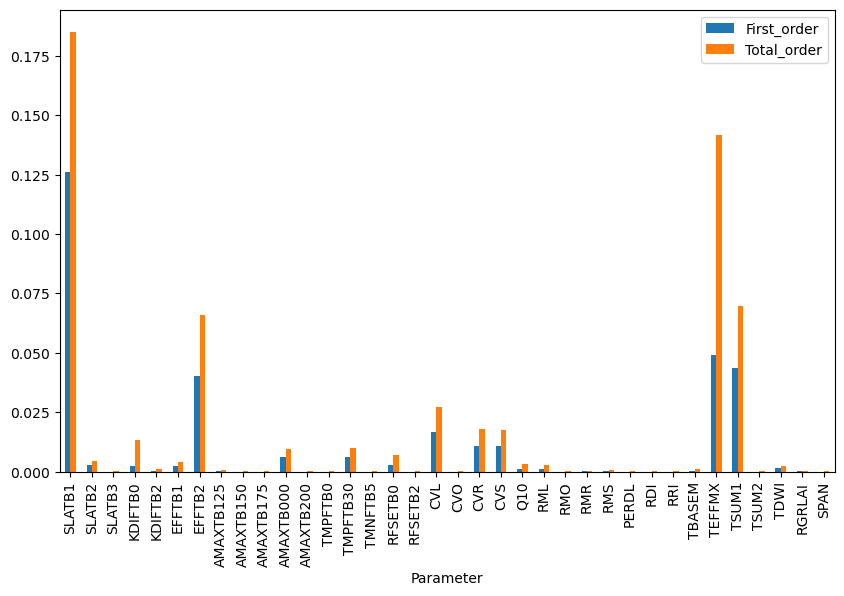

In [33]:
df_sensitivity = pd.DataFrame({
    "Parameter": problem["names"],
    "First_order": Si["S1"],
    "Total_order": Si["ST"]}).set_index("Parameter")
fig, axes = plt.subplots(figsize=(10,6))
df_sensitivity.plot(kind="bar", ax=axes)

In [ ]:
mycropd = {
    "AMAXTB": [0.0, 70.0, 1.25, 70.0, 1.5, 63.0, 1.75, 49.0, 2.0, 21.0],
    "TMPFTB": [0.00, 0.01, 9.00, 0.05, 16.0, 0.80, 18.0, 0.94, 20.0, 1.0, 30.0, 1.0, 36.0, 0.95, 42.0, 0.56],
    "TMNFTB": [5.0, 0.0, 8.0, 1.0],
    "RFSETB": [0.0, 1.0, 1.5, 1.0, 1.75, 0.75, 2.0, 0.25],
    "SLATB": [0.0, 0.0026, 1.0, 0.0012, 2.0, 0.0012],
    "KDIFTB": [0.0, 0.6, 2.0, 0.6],
    "EFFTB": [0.0, 0.45, 40.0, 0.45]

}

In [34]:
def aa(mm):
    return (0.5*mm, 1.5*mm)

In [77]:
import numpy as np
import pandas as pd

In [97]:
with open("./fastsample1.sam", "r", encoding="utf-8") as f:
    tmp_list, res_list = list(), list()
    count = 0
    for num, line in enumerate(f):
        if num == 1:
            total = int(line)
            continue
        elif num == 2:
            num_var = int(line)
            continue
        
        try:
            line = line.rstrip()
            tmp_list = line.split('\t')
            # print(len(tmp_list))
            if len(tmp_list) == num_var and count < total:
                res_list.append(tmp_list)
                count += 1
            
        except ValueError:
            pass
        

In [98]:
aa = np.array(res_list, dtype=np.float64)

In [99]:
aa.shape

(4932, 36)

In [95]:
aa[-1][0]

0.003701594554

In [96]:
aa

array([[1.50075183e-03, 1.45380099e-03, 1.46806425e-03, ...,
        3.65866366e+01, 1.55545851e-02, 4.30719936e+01],
       [1.74450364e-03, 1.43628274e-03, 1.50310075e-03, ...,
        3.73165636e+01, 1.47038091e-02, 4.35537454e+01],
       [2.38975912e-03, 1.41876449e-03, 1.53813725e-03, ...,
        3.80464906e+01, 1.55622032e-02, 4.40354972e+01],
       ...,
       [3.62568215e-03, 1.13725377e-03, 1.35508812e-03, ...,
        4.37674213e+01, 3.26535773e-02, 4.36812611e+01],
       [3.66363835e-03, 1.17229027e-03, 1.37260637e-03, ...,
        4.52272753e+01, 3.22243802e-02, 4.71289579e+01],
       [3.70159455e-03, 1.20732676e-03, 1.39012462e-03, ...,
        4.66871294e+01, 3.17951831e-02, 3.89391769e+01]])

In [1]:
import numpy as np
import pandas as pd

In [2]:
np1 = np.zeros((5, 9))

In [5]:
np.savetxt("./txt.psc", np1, delimiter="\t")

In [7]:
with open("./txt.psc", "r+", encoding="utf-8") as f:
    f.seek(0)


In [8]:
def convert2simlab(input_data: pd.DataFrame, output_file):
    np.savetxt(output_file, input_data.to_numpy(), delimiter="\t")
    var_name = input_data.columns
    row, col = input_data.shape
    with open(output_file, "r+", encoding='utf-8') as sf:
        sf.seek(0)
        sf.write("%s\n"%col)
        for each in var_name:
            sf.write("%s\n"%each)
        sf.write("time\t=\tno\n")
        sf.write("%s\n"%row)

In [9]:
df1 = pd.DataFrame(np1, columns=["0", "s", "3", "4", "5", "6", "7", "8", "9"])

In [10]:
convert2simlab(df1, "./txt.psc")

In [9]:
dff = pd.read_csv("./2021pp.txt")

In [128]:
with open("./data/simlabout/2022PPN0.txt", 'r') as f:
    buffer = f.readlines()
    first_order = list()
    total_order = list()
    flag1, flag2 = False, False
for each in buffer:
    each = each.strip()
    
    # each.rstrip()
    if "Fast first order indexes" in each:
        flag1 = True
        continue
    if "Fast total order Indexes" in each:
        flag1 = False
        flag2 = True
        continue
    each = each.split('\t')
    if each[0] == "":
        continue
    if flag1:
        first_order.append(each)
    if flag2:
        total_order.append(each)

    


    
            

In [129]:
import copy

In [130]:
header = copy.deepcopy(first_order[0])
for i, value in enumerate(header):
    value = value.strip()
    header[i] = f"{value}"
header.insert(0, "Parameters")
df1 = pd.DataFrame(first_order[1: ], columns=header)
df1.set_index("Parameters", drop=True, inplace=True)

header = copy.deepcopy(total_order[0])
for i, value in enumerate(header):
    value = value.strip()
    header[i] = f"ST{value}"
header.insert(0, "Parameters")
df2 = pd.DataFrame(total_order[1: ], columns=header)
df2.set_index("Parameters", drop=True, inplace=True)

In [131]:
df = pd.concat([df1, df2], axis=1)
df = df.astype(np.float64)

In [127]:
df2021 = df

In [133]:
df4 = (df2021 + df) / 2

,LAIMAX,TAGP,TWSO,STLAIMAX,STTAGP,STTWSO
Parameters,,,,,,
SLATB1,0.317350,0.132550,0.087850,0.486683,0.236310,0.194945
SLATB2,0.026750,0.006300,0.007600,0.059493,0.020514,0.023208
SLATB3,0.000031,0.000017,0.000032,0.008558,0.009147,0.010457
KDIFTB0,0.084200,0.061800,0.049650,0.121283,0.091592,0.079549
KDIFTB2,0.000065,0.000124,0.000351,0.015191,0.014098,0.019032
EFFTB1,0.002050,0.004700,0.008800,0.011664,0.015628,0.022894
EFFTBB2,0.038600,0.060950,0.073450,0.089358,0.120133,0.137495
AMAXTB125,0.001600,0.005550,0.006650,0.012029,0.018063,0.021430
AMAXTB150,0.000029,0.000239,0.000544,0.009132,0.008594,0.008893


In [118]:
from matplotlib import pyplot as plt

In [119]:
df.columns

Index(['LAIMAX', 'TAGP', 'TWSO', 'STLAIMAX', 'STTAGP', 'STTWSO'], dtype='object')

<AxesSubplot:xlabel='Parameters'>

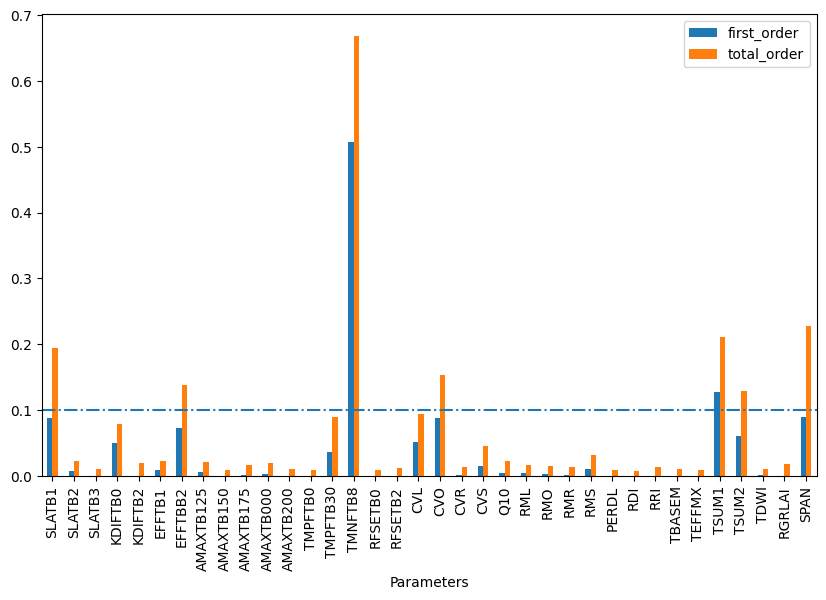

In [138]:
df_sensitivity = pd.DataFrame({"Parameters": df4.index, "first_order": df4["TWSO"], "total_order": df4["STTWSO"]}).set_index("Parameters")
fig, axes = plt.subplots(figsize=(10,6))
axes.axhline(y=0.1, ls="-.")
df_sensitivity.plot(kind="bar", ax=axes)

In [65]:
df1.set_index("Parameters")

,LAIMAX,TAGP,TWSO
Parameters,,,
SLATB1,0.3155,0.1250,0.0803
SLATB2,0.0272,0.0063,0.0071
SLATB3,3.06e-005,1.34e-005,3.08e-005
KDIFTB0,0.1073,0.0804,0.0637
KDIFTB2,1.33e-005,5.05e-005,2.12e-005
EFFTB1,0.0026,0.0053,0.0091
EFFTBB2,0.0360,0.0548,0.0564
AMAXTB125,0.0012,0.0048,0.0057
AMAXTB150,9.06e-006,0.000212,0.000481


,Fast first order indexes
0,\t LAIMAX\t ...
1,SLATB1\t 0.3155\t ...
2,SLATB2\t 0.0272\t ...
3,SLATB3\t 3.06e-005\t ...
4,KDIFTB0\t 0.1073\t ...
5,KDIFTB2\t 1.33e-005\t ...
6,EFFTB1\t 0.0026\t ...
7,EFFTBB2\t 0.0360\t ...
8,AMAXTB125\t 0.0012\t ...
9,AMAXTB150\t 9.06e-006\t ...
